In [1]:
#Reading dataset
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
iris_data=pd.read_excel('iris.xls')
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


SO IM DOING UNSUPERVISED LEARNING AND THERE IS NO NEED OF LABELED DATA(CLASSIFICATION) AND ID TOO BECOZ NO USE OF THAT(HERE IN THIS DATASET WE DONT HAVE SEPARATE ID) SO IM GONNA ONLY USR COL 1 TO 4

In [2]:
data=iris_data.iloc[:,0:4]
data.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.shape

(150, 4)

In [4]:
data.isna().sum()

SL    0
SW    0
PL    0
PW    0
dtype: int64

In [5]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### PAIR PLOT

In [6]:
#PAIR PLOT VISUALIZE THE RELATIONSHIP BETWEEN EACH FEATURES FROM THE DATASET

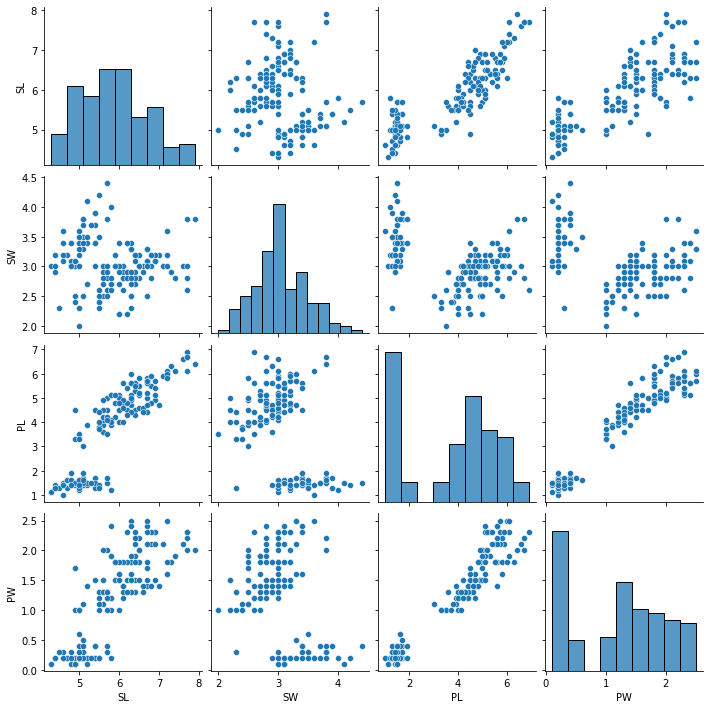

In [7]:
import seaborn as sns
sns.pairplot(data)

### MODEL CREATION

## K-MEANS

In [8]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)  #just taking n_clusters as 3 for eg.
model_kmeans.fit(data)
labels=model_kmeans.predict(data) #predicting
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [9]:
#GRAPH

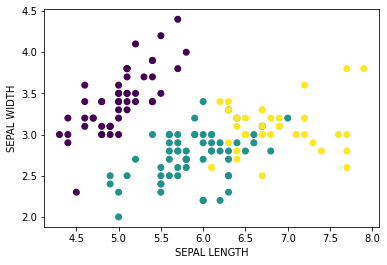

In [10]:
import matplotlib.pyplot as plt
sl=data['SL'] #we are just taking 2 features for our graph otherwise its difficult to plot 
sw=data['SW']
plt.xlabel('SEPAL LENGTH')
plt.ylabel('SEPAL WIDTH')
plt.scatter(sl,sw,c=labels)

In [11]:
#PREDICT THE MODEL USING SAMPLE INPUTS

In [12]:
samples=[[1.2,3.4,5,.6]]
new_label=model_kmeans.predict(samples)
print(new_label)

[1]


In [13]:
#tht means those samples belongs to cluster 1

OPTIUM NO OF CLUSTERS CAN GET BY USING ELBOW MTD .IN ELBOW MTD WE CAN FOCUS ON INERTIA WE WILL FIND INERTIA FIRST

In [14]:
#INERTIA FOR OUR MODEL WITH EXAMPLE N+CLUSTERS AS 3

In [15]:
model_kmeans.inertia_

78.94084142614601

FOR A GOOD MODEL INERTIA SHOULD BE LOW BUT WE CANT MAKE THE INERTIA TOO LOW ALSO,BUT BY LOOKING UP THE VALUE OF INERTIA WE CAN FIND OPTIMUM NO OF CLUSTERS

In [16]:
#PLOT ELBOW

In [17]:
#CREATING RANGE
ks=range(1,6)
inertia=[]

In [18]:
for i in ks:
    model=KMeans(n_clusters=i)
    model.fit(data)
    inertia.append(model.inertia_)

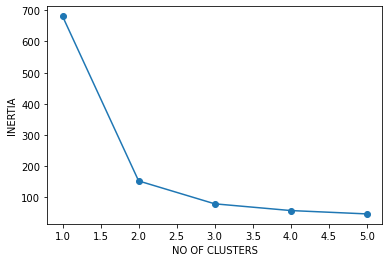

In [19]:
#plot
import matplotlib.pyplot as plt
plt.plot(ks,inertia,'-o')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('INERTIA')
plt.show()

In [20]:
#TAKING N_CLUSTERS AS 3

In [21]:
#evaluate the model

In [22]:
iris_data['Classification'] #original dataset

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [23]:
iris_data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [24]:
classification=iris_data['Classification']
df=pd.DataFrame({'label':labels,'Classification':classification})
df.head()

,label,Classification
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa


In [25]:
#creating cross tab

In [26]:
pd.crosstab(df['label'],df['Classification'])

Classification,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,48,14
2,0,2,36


In [27]:
 #for solving the miss clustering use scaling we will chk both std scaling and normalizing

In [34]:
#standardscaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.pipeline import make_pipeline #seq of action
pipe=make_pipeline(scaler,model_kmeans)
#first scale the data then fit the data
pipe.fit(data)
labels_sc=pipe.predict(data)
print(labels_sc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [29]:
#use df 
classification=iris_data['Classification']
df=pd.DataFrame({'label':labels_sc,'Classification':classification})
pd.crosstab(df['label'],df['Classification'])

Classification,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,11,36
1,50,0,0
2,0,39,14


In [30]:
#still miss clustering so we will try normaizing

In [31]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
pipe1=make_pipeline(norm,model_kmeans)
pipe1.fit(data)
labels_no=pipe1.predict(data)
print(labels_no)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
#use df 
classification=iris_data['Classification']
df=pd.DataFrame({'label':labels_no,'Classification':classification})

In [33]:
pd.crosstab(df['label'],df['Classification'])

Classification,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,45,0
1,50,0,0
2,0,5,50


In [35]:
#got better model now but we can only chk like this uf the labelled data is available